# CNN for Fashion-MNIST Clothing Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Building an Image Classifier

First install and import Tensorflow and Keras

conda install tensorflow

conda install pip

pip install --upgrade tensorflow==2.0.0.rc1

Or else see documentation: https://www.tensorflow.org/install/pip

In [2]:
import tensorflow as tf
from tensorflow import keras

#### To check the version of Keras

In [3]:
keras.__version__

'2.4.0'

#### To check the version of Tensorflow

In [4]:
tf.__version__

'2.3.0'

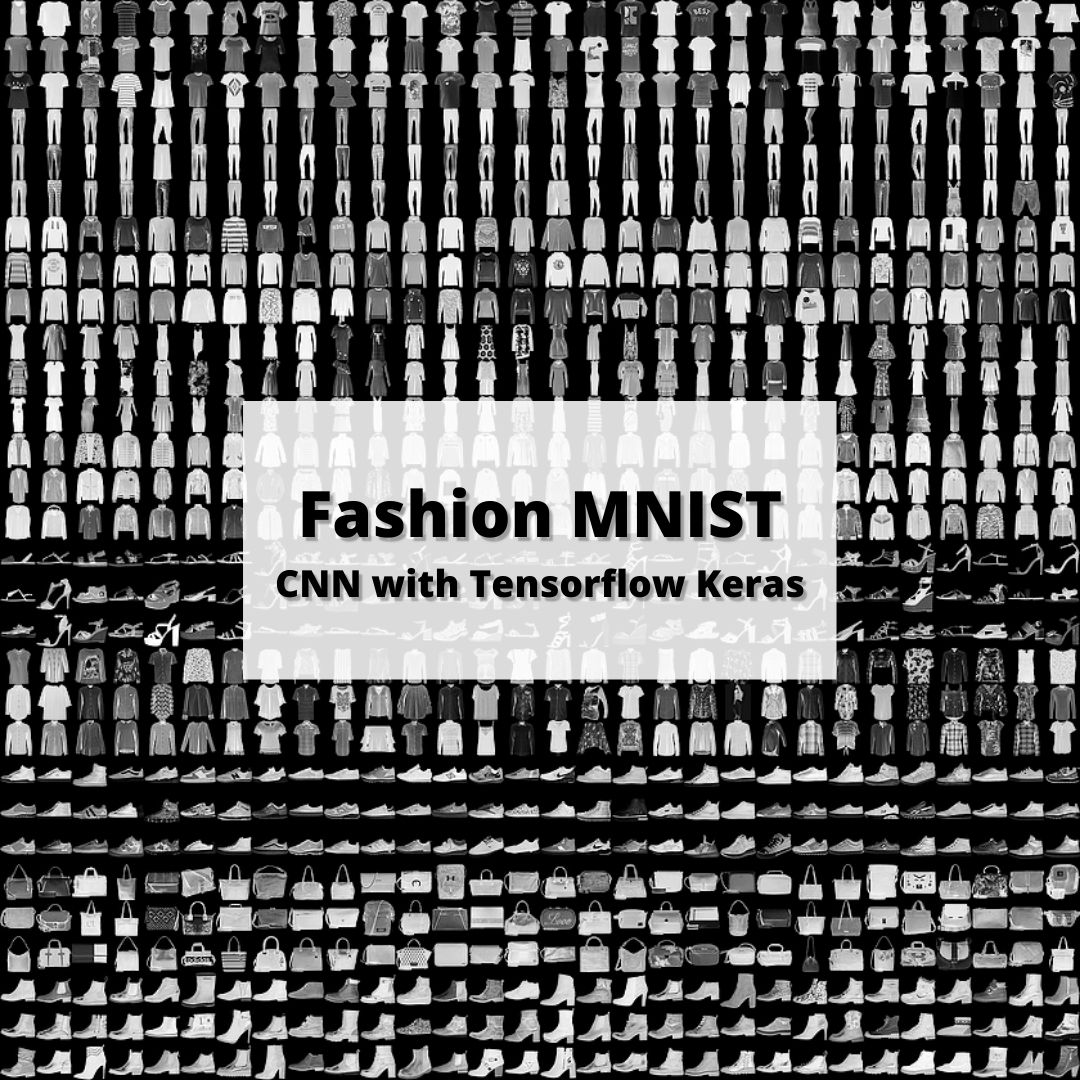

Link : https://keras.io/api/datasets/fashion_mnist/

Loads the Fashion-MNIST dataset.

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

| Label	| Description |
|-------|-------------|
|0	    |T-shirt/top  |
|1      |Trouser      |
|2	    |Pullover     |
|3	    |Dress        |
|4	    |Coat         |
|5	    |Sandal       |
|6	    |Shirt        |
|7	    |Sneaker      |
|8	    |Bag          |
|9	    |Ankle boot   |

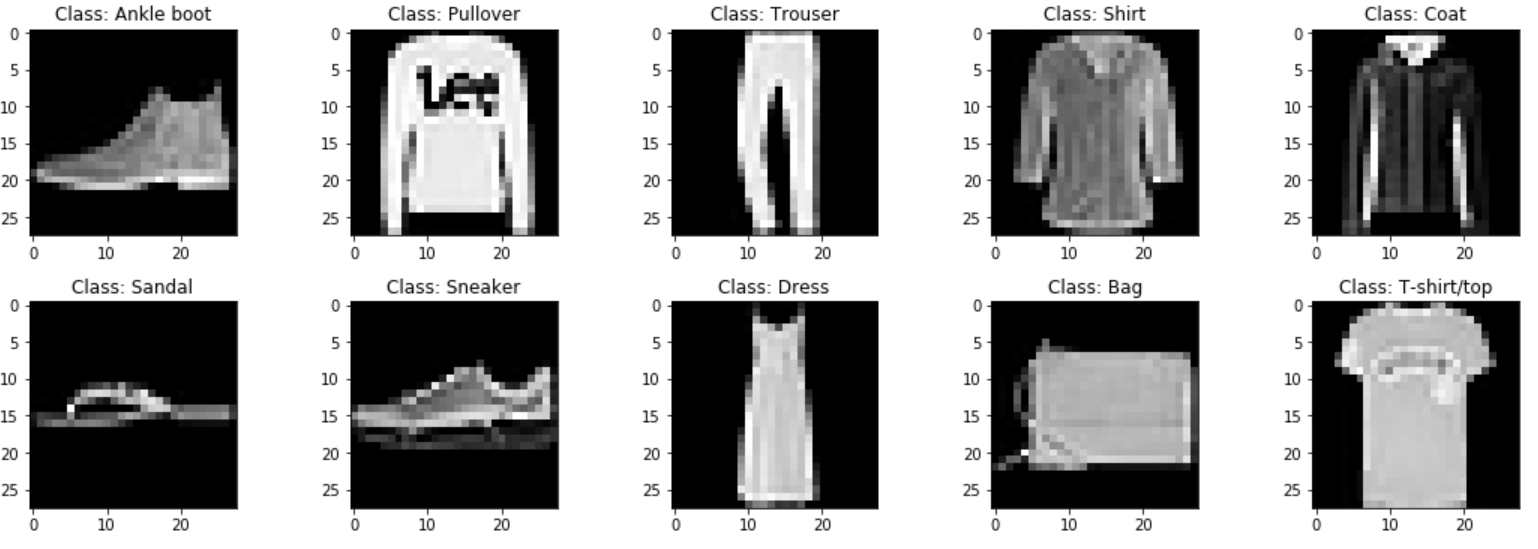

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

## Data Reshaping

In [8]:
x_train_full = x_train_full.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

## Data Normalization

We normalize the data dimensions so that they are of approximately the same scale.

In [9]:
x_train_n = x_train_full / 255.0
x_test_n = x_test / 255.0

# as data is in the range of 0 to 255 so we directly divide it by 255 -
#                  ....and that too float because we want floating values between 0 and 1.

# but acutal process is to subtract the mean from these number and divide it by standard deviation.

### Splitting the data into Train/Validation/Test datasets

In the earlier steps of importing the data, we had 60,000 datasets for training and 10,000 tests datasets. Now we further split the training data into train/validation. Here's how each type of dataset is used in Deep Learning.


- Training Data --- used for training the model.
- Validation Data --- used for tuning the hyperparameters and evaluate the models.
- Test Data --- used to test the model after model has gone through initial vetting by the validation set.

In [10]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

## Create the Model Architecture 

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

# random.seed will help to reproduce the same result using the same initial weights every time.

### Architecture

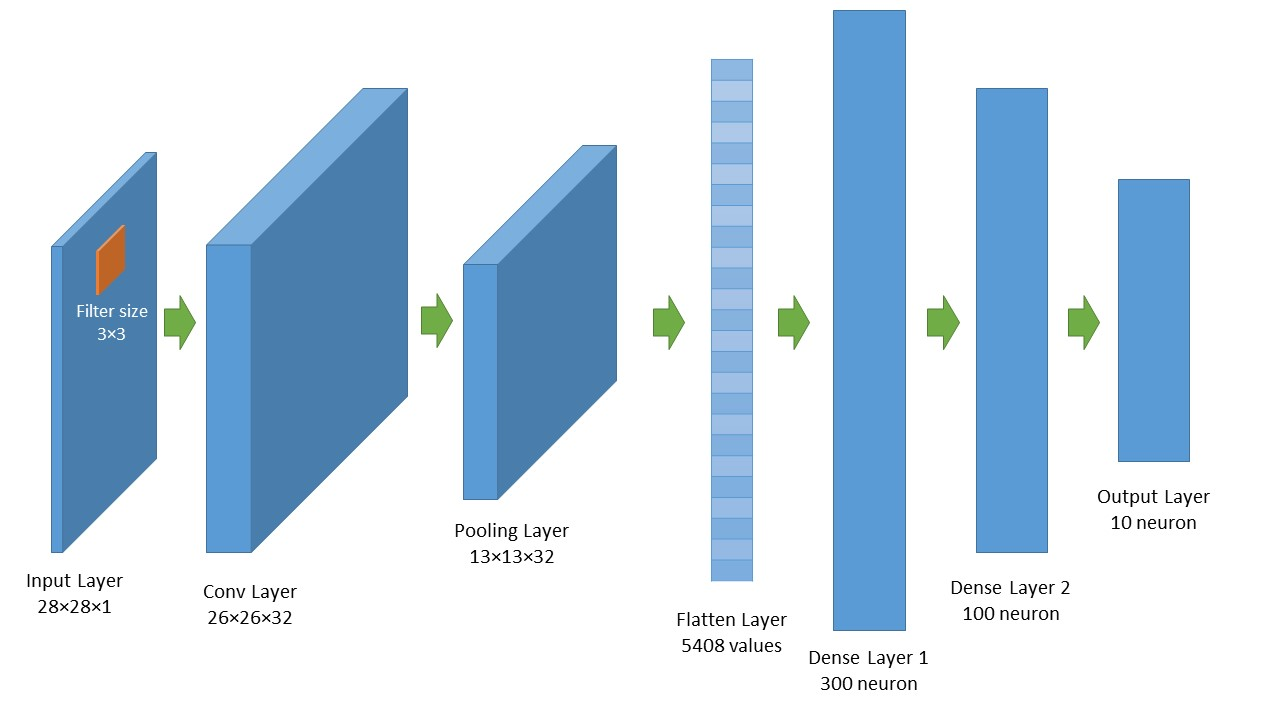

### Create Neural Network using Sequential Model API

Multi-Level Percepton Model

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())                                  #input layer
model.add(keras.layers.Dense(300, activation = "relu"))            #hidden layer 1
model.add(keras.layers.Dense(100, activation = "relu"))            #hidden layer 2
model.add(keras.layers.Dense(10, activation = "softmax"))          #output layer

# Conv layer    = it uses information from adjacent pixels to down-sample the image 
                    # and then use prediction layer to predict the target values
# Pooling layer = reduce the dimension of feature maps
# Flatten       = to convert 2D array into single array
# Dense         = each neurons receives input from all the neurons of previous layer
# relu          = output the input directly if it is positive, otherwise, it will output zero
# softmax       = it is used in last output layer and it converts a vector of numbers into a vectors of probabiilities
                    # or it equates the sum of all the class probability to one

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In dense layer we can see parameters as 1622700 neurons, if we have not used Max Pooling layer then the parameters would have been 4 - 5 millions neurons.

### Structure of Neural Network

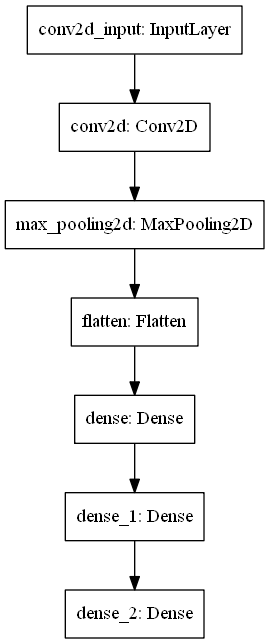

In [14]:
import pydot
keras.utils.plot_model(model)

### Compiling Model

In [15]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

#because we have labels in dataset we are using sparse_categorical_crossentropy

In [16]:
model_history = model.fit(x_train, y_train, epochs = 30, batch_size = 64,
                         validation_data = (x_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 11s 12ms/step - loss: 0.8768 - accuracy: 0.6990 - val_loss: 0.7497 - val_accuracy: 0.7360
Epoch 2/30
860/860 [==============================] - 10s 12ms/step - loss: 0.5388 - accuracy: 0.8048 - val_loss: 0.4953 - val_accuracy: 0.8164
Epoch 3/30
860/860 [==============================] - 11s 13ms/step - loss: 0.4807 - accuracy: 0.8261 - val_loss: 0.9059 - val_accuracy: 0.7114
Epoch 4/30
860/860 [==============================] - 11s 13ms/step - loss: 0.4436 - accuracy: 0.8411 - val_loss: 0.4141 - val_accuracy: 0.8578
Epoch 5/30
860/860 [==============================] - 11s 13ms/step - loss: 0.4194 - accuracy: 0.8499 - val_loss: 0.4365 - val_accuracy: 0.8474
Epoch 6/30
860/860 [==============================] - 11s 13ms/step - loss: 0.3956 - accuracy: 0.8583 - val_loss: 0.3776 - val_accuracy: 0.8700
Epoch 7/30
860/860 [==============================] - 11s 13ms/step - loss: 0.3780 - accuracy: 0.8663 - val_loss: 0.4055 - val_accuracy:

### Visualization of Accuracy Score with each Epochs

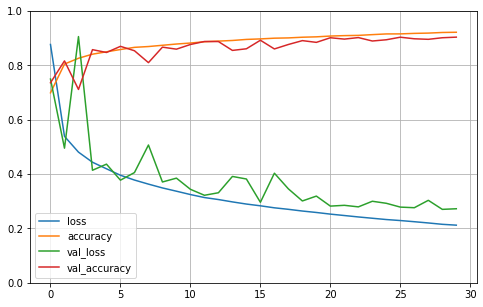

In [17]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

As we can see with each epoch the training accuracy and the validation accuracy is increasing and loss is decreasing.

We can also see that the model has not converged yet, the validation accuracy is still going up and validation loss is still going down.

Therefore we should run with more epoch.

In [18]:
model_history.history

{'loss': [0.8767741322517395,
  0.5388164520263672,
  0.48072245717048645,
  0.443588525056839,
  0.4194464385509491,
  0.39563634991645813,
  0.3780497908592224,
  0.3630562722682953,
  0.3490421175956726,
  0.33699241280555725,
  0.3246682286262512,
  0.3136827349662781,
  0.3063253164291382,
  0.2976583242416382,
  0.2897135317325592,
  0.28327053785324097,
  0.2758793234825134,
  0.2703482210636139,
  0.2640315294265747,
  0.258740097284317,
  0.2526897192001343,
  0.2475036382675171,
  0.2422744631767273,
  0.23747679591178894,
  0.23273412883281708,
  0.2290477454662323,
  0.22474174201488495,
  0.22016480565071106,
  0.2151859551668167,
  0.2120613157749176],
 'accuracy': [0.6989818215370178,
  0.8048363924026489,
  0.826090931892395,
  0.8411454558372498,
  0.8498545289039612,
  0.8582909107208252,
  0.8662727475166321,
  0.8692545294761658,
  0.8738727569580078,
  0.8784909248352051,
  0.8821272850036621,
  0.8868545293807983,
  0.8892363905906677,
  0.8915454745292664,
  0.89

In [19]:
ev = model.evaluate(x_test, y_test)               # to check accuracy score or performance of model

313/313 [==============================] - 1s 3ms/step - loss: 0.2836 - accuracy: 0.8978


In [20]:
ev

[0.2835814356803894, 0.8978000283241272]

As we can see the output the the first value is the loss and the second value is the accuracy.

The accuracy we are getting is 89% which is pretty good using single conv layer but if we use multiple conv layers and we run it for few more epochs we will definitely get better accuracy.

### Let's now see how to predict the probabilities and how to predict the classes on new unseen data.

In [21]:
x_new = x_test[:3]

In [22]:
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

As you can see our new data contains 3 records (x_new) and there are 10 values in each of these elements representing the probability value of corresponding class.

With .predict method we are predicting probabilities but if we want to directly predict the class and not the probability scores we can use .predict_classes method

In [23]:
y_pred = model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

When we cross check .predict_classes with .predict we can see that maximum probability corresponds to position numbers at 9, 2, 1 as 0.95, 0.99, and 1. for 3 records.

Instead of numerical labels we can call the label description.

In [24]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Plot the images of x_new dataset.

AxesImage(54,36;334.8x217.44)


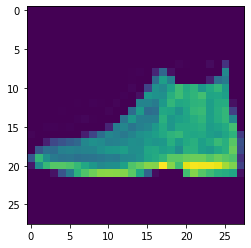

In [25]:
print(plt.imshow(x_test[0].reshape((28,28))))

AxesImage(54,36;334.8x217.44)


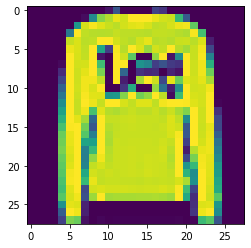

In [26]:
print(plt.imshow(x_test[1].reshape((28,28))))

AxesImage(54,36;334.8x217.44)


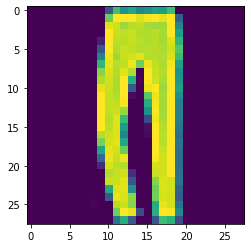

In [27]:
print(plt.imshow(x_test[2].reshape((28,28))))

In [28]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session()>

In [29]:
del model

### Architecture - Pooling vs No Pooling

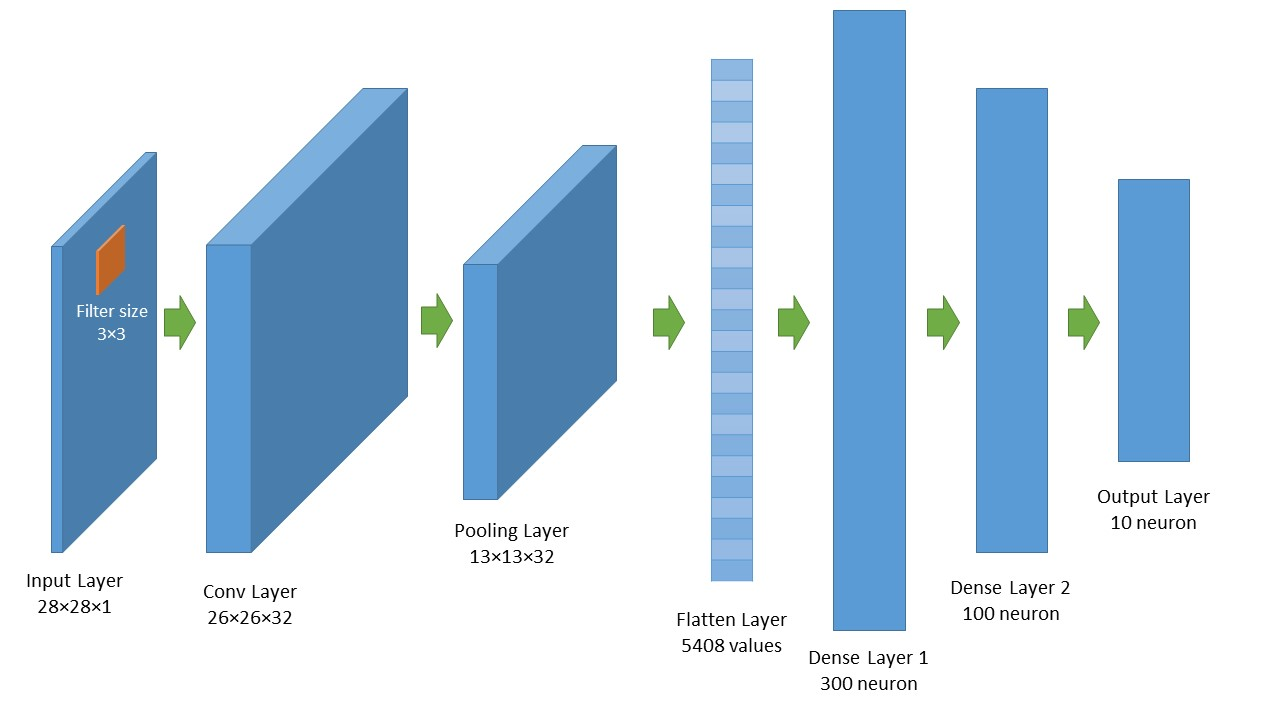

### Pooling vs No Pooling

In [30]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))

In [31]:
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [32]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


When comparing model_a and model_b, model_b has 6.5 millions trainable parameters.

In [33]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [34]:
model_history_a = model_a.fit(x_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(x_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 12s 14ms/step - loss: 0.8465 - accuracy: 0.7085 - val_loss: 0.7910 - val_accuracy: 0.7102
Epoch 2/3
860/860 [==============================] - 12s 14ms/step - loss: 0.5360 - accuracy: 0.8061 - val_loss: 0.5006 - val_accuracy: 0.8076
Epoch 3/3
860/860 [==============================] - 11s 13ms/step - loss: 0.4787 - accuracy: 0.8273 - val_loss: 0.9677 - val_accuracy: 0.6960


In [35]:
model_history_b = model_b.fit(x_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(x_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 20s 24ms/step - loss: 0.7398 - accuracy: 0.7452 - val_loss: 0.7276 - val_accuracy: 0.7492
Epoch 2/3
860/860 [==============================] - 20s 24ms/step - loss: 0.4953 - accuracy: 0.8219 - val_loss: 0.4687 - val_accuracy: 0.8224
Epoch 3/3
860/860 [==============================] - 21s 24ms/step - loss: 0.4435 - accuracy: 0.8399 - val_loss: 0.9874 - val_accuracy: 0.6972


- model_b takes more time than model_a therefore accuracy will be less as trainable parameters are less for Pooling layers.
- accuracy of model_b is more and val_accuracy is same for both.